In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from torch.utils.data import TensorDataset, DataLoader
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv('CarsData.csv', delimiter=',')
numerical_features = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
categorical_features = ['model', 'transmission', 'fuelType', 'Manufacturer']
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [16]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [12]:
print('Number of rows and columns:', df.shape)
[f'Number of unique values in column {column}: {len(df[column].unique())}' for column in df.columns]

Number of rows and columns: (97712, 10)


['Number of unique values in column model: 196',
 'Number of unique values in column year: 27',
 'Number of unique values in column price: 13236',
 'Number of unique values in column transmission: 4',
 'Number of unique values in column mileage: 42214',
 'Number of unique values in column fuelType: 5',
 'Number of unique values in column tax: 48',
 'Number of unique values in column mpg: 208',
 'Number of unique values in column engineSize: 40',
 'Number of unique values in column Manufacturer: 9']

In [61]:
# Categorical feature value counts and consolidation
category_counts = {col: df[col].value_counts() for col in df.columns}
# print(category_counts['year'][:5])
# print(category_counts['model'][:5])
# print(category_counts['engineSize'][:3])

# Consolidate categorical data
# df['model'] = df['model'].apply(lambda x: x if category_counts['model'][x] > 5 else 'Other')
# df['year'] = df['year'].apply(lambda x: x if category_counts['year'][x] > 2 else 'Other')
# df['engineSize'] = df['engineSize'].apply(lambda x: x if category_counts['engineSize'][x] > 2 else 'Other')

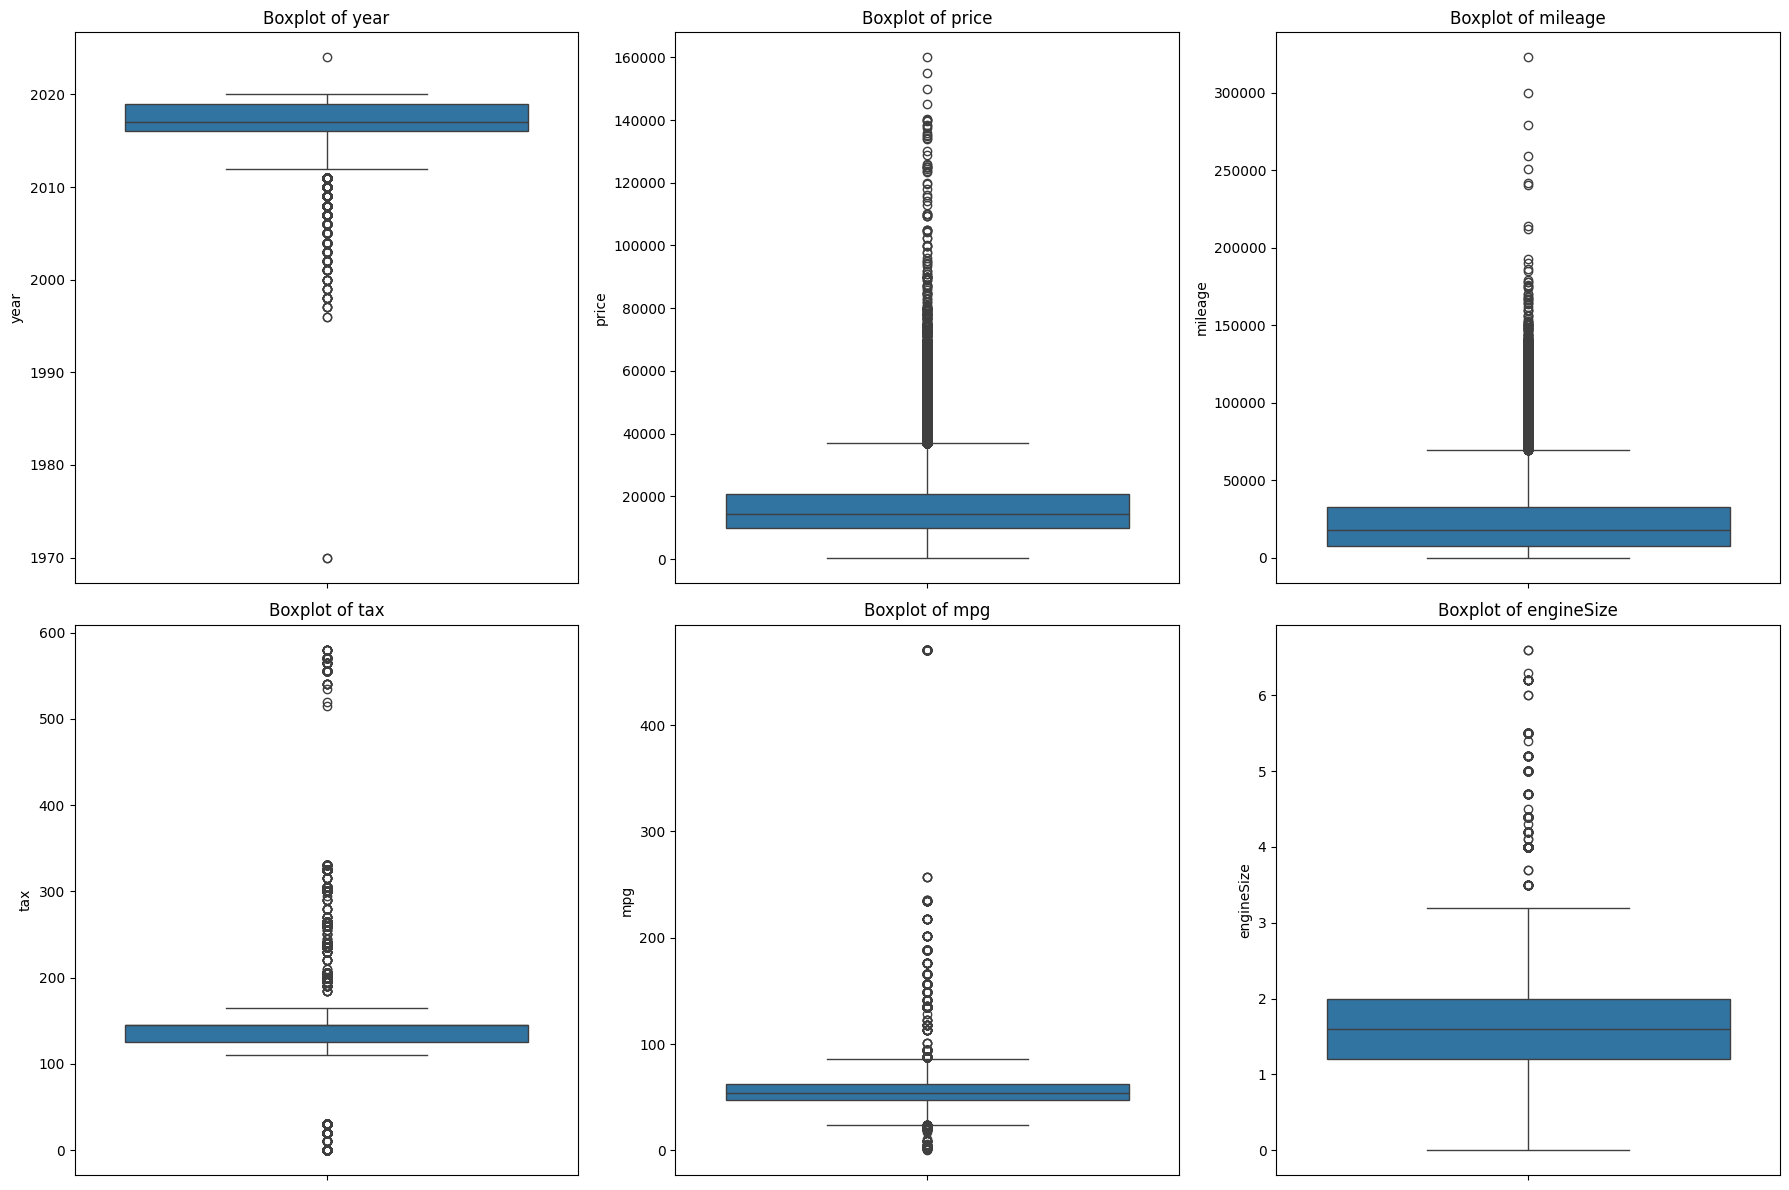

In [62]:
# Boxplot of numerical features
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for idx, feature in enumerate(numerical_features):
    sns.boxplot(df[feature], ax=ax[idx//3][idx%3])
    ax[idx//3][idx%3].set_title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

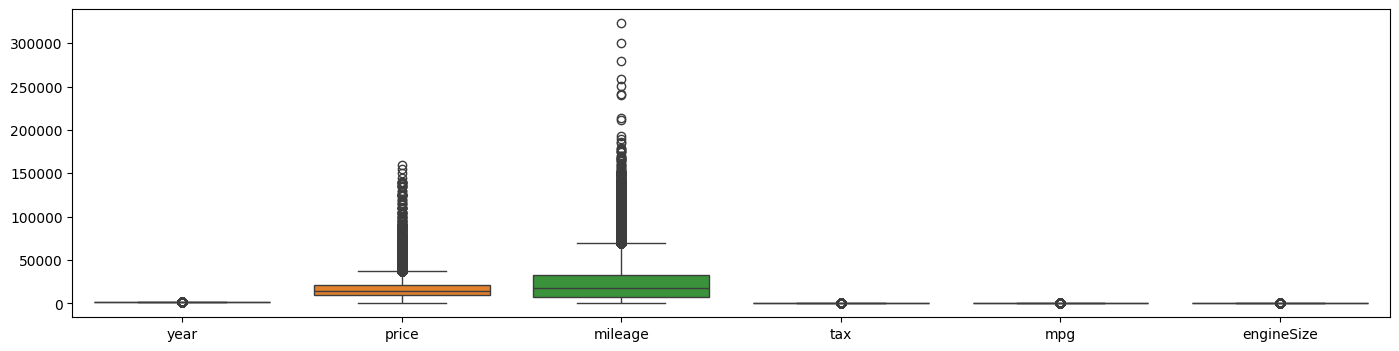

In [64]:
# Boxplot of categorical features
fig, ax = plt.subplots(1, figsize=(17, 4))
ax = sns.boxplot(data=df)
plt.show()

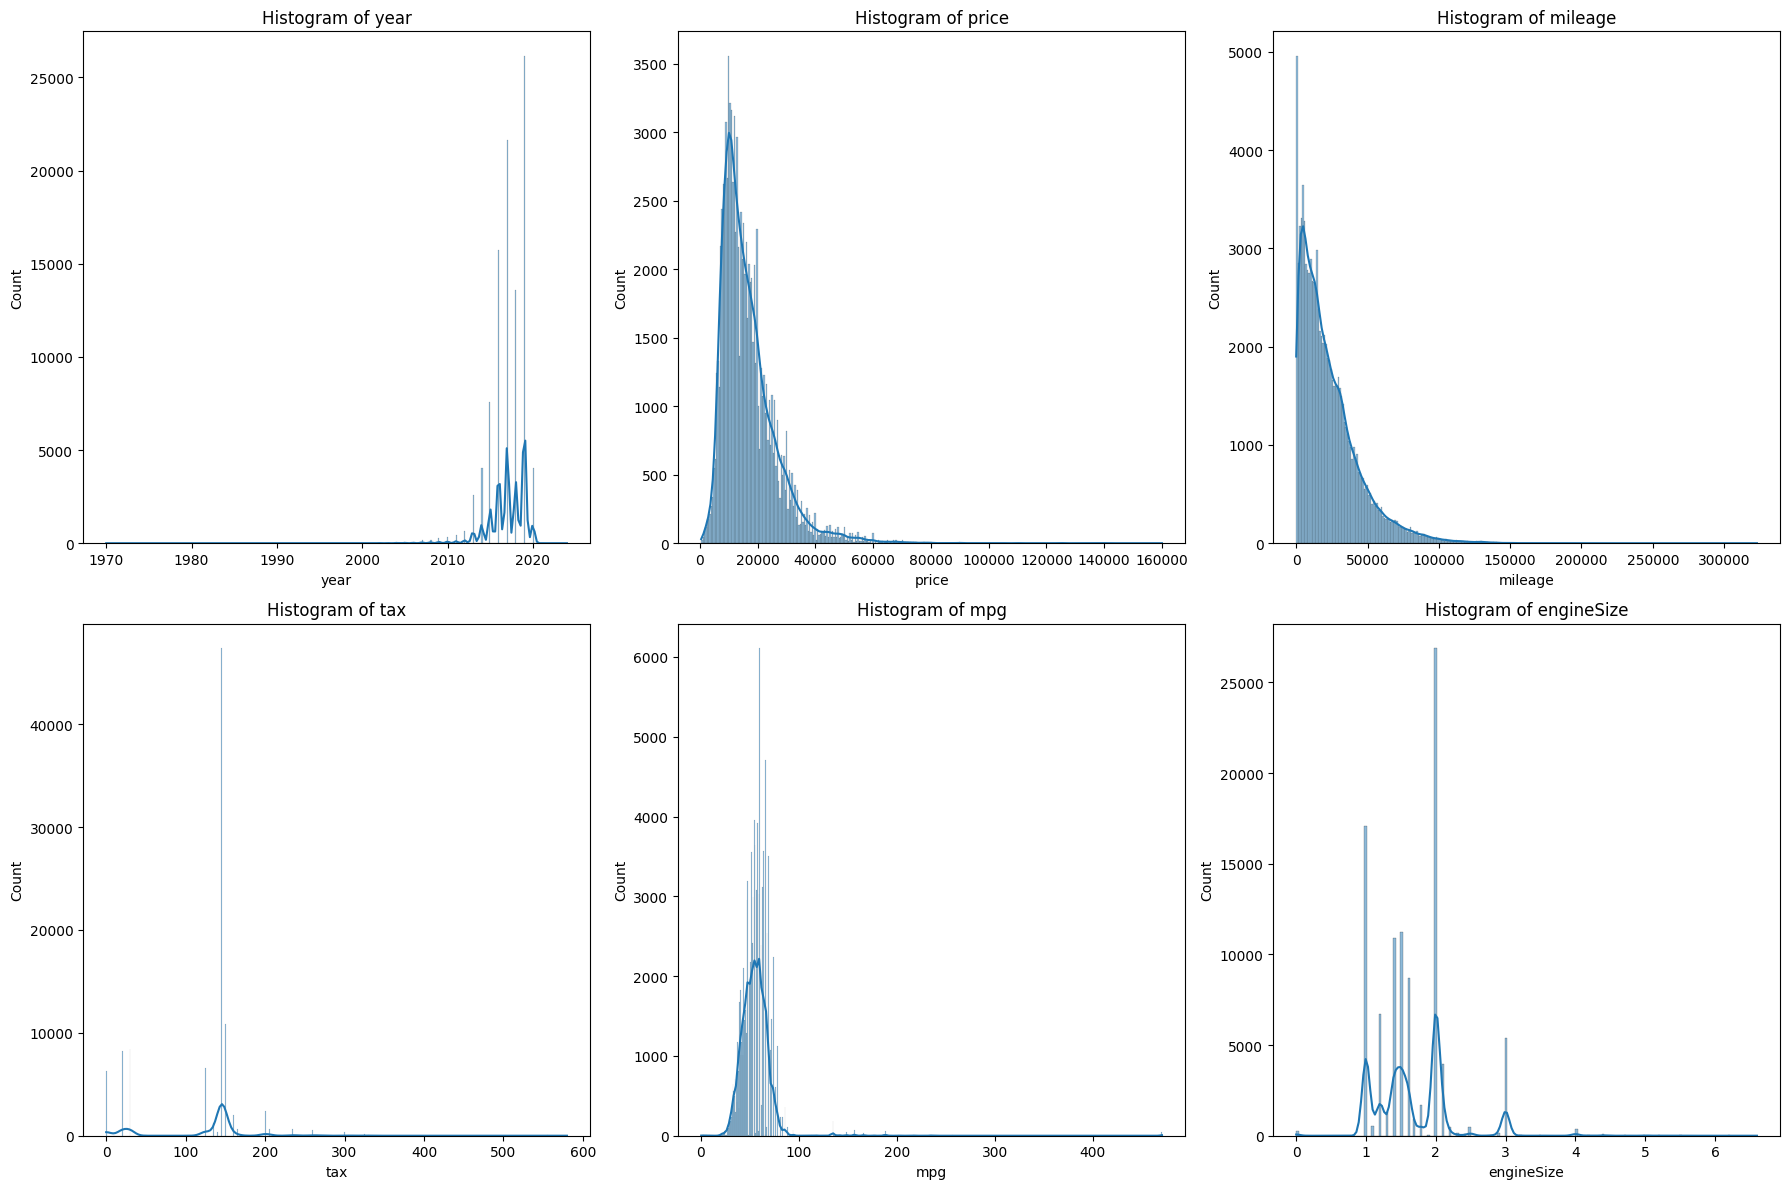

In [65]:
# Histogram of numerical features
fig, ax = plt.subplots(2, 3, figsize=(18, 12))
for idx, feature in enumerate(numerical_features):
    sns.histplot(df[feature], ax=ax[idx//3][idx%3], kde=True)
    ax[idx//3][idx%3].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

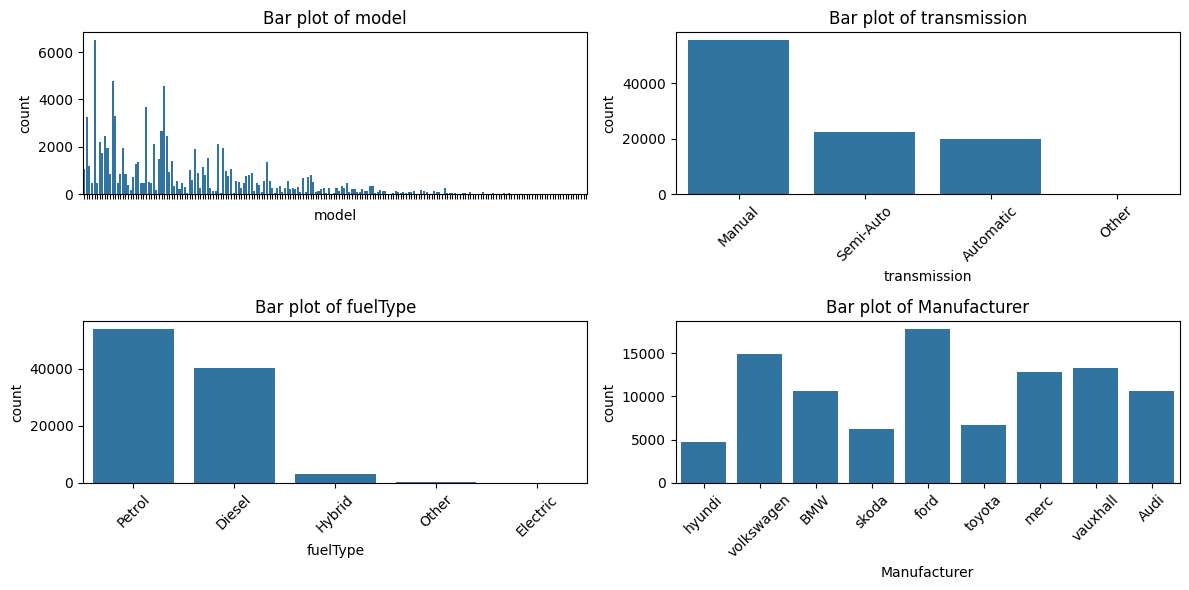

In [72]:
# Bar plot of categorical features
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for idx, feature in enumerate(categorical_features):
    sns.countplot(data=df, ax=ax[idx//2][idx%2], x=feature)
    ax[idx//2][idx%2].set_title(f'Bar plot of {feature}')
    if feature == 'model':
        ax[idx//2][idx%2].set_xticklabels(labels=[], rotation=90)
    else:
        ax[idx//2][idx%2].set_xticklabels(labels=ax[idx//2][idx%2].get_xticklabels(), rotation=45)
        
plt.tight_layout()
plt.show()

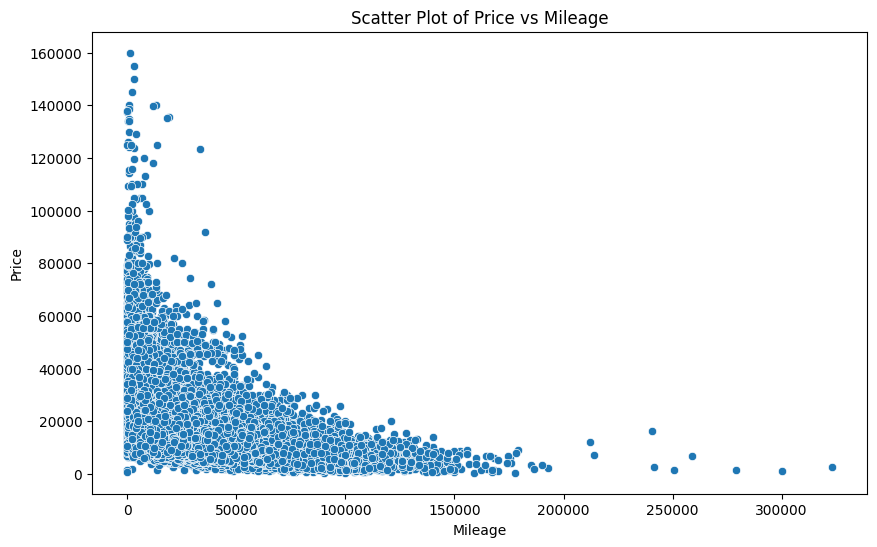

In [73]:
# Scatter plot for price vs mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage', y='price')
plt.title('Scatter Plot of Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

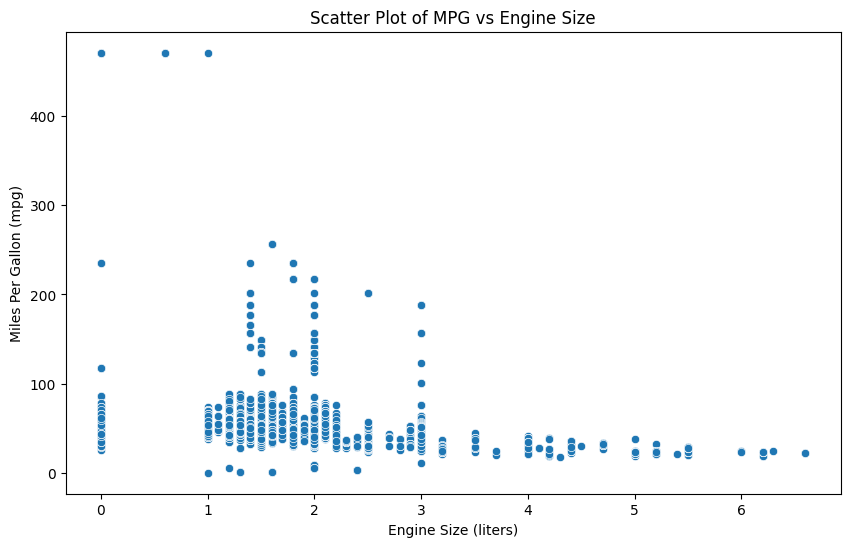

In [74]:
# Scatter plot for mpg vs engineSize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engineSize', y='mpg')
plt.title('Scatter Plot of MPG vs Engine Size')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Miles Per Gallon (mpg)')
plt.show()

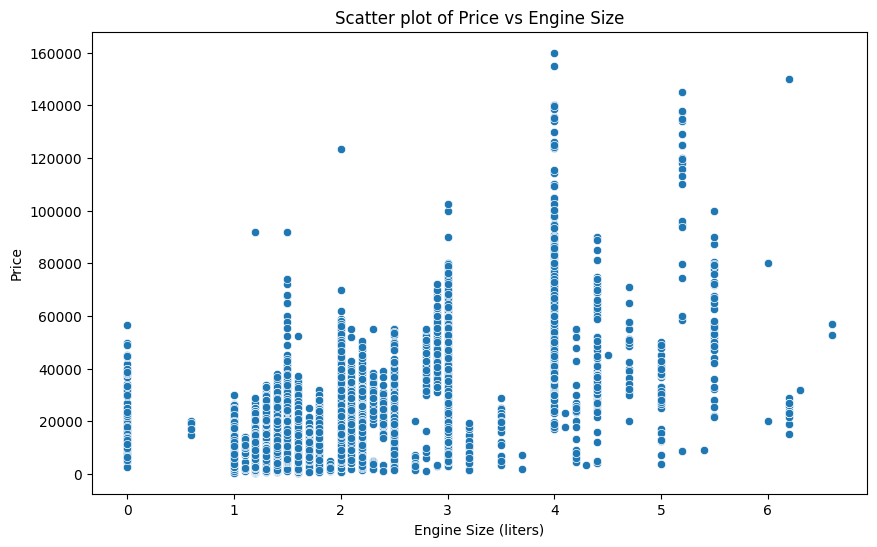

In [75]:
# Scatter plot for proce vs engineSize
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='engineSize', y='price')
plt.title('Scatter plot of Price vs Engine Size')
plt.xlabel('Engine Size (liters)')
plt.ylabel('Price')
plt.show()

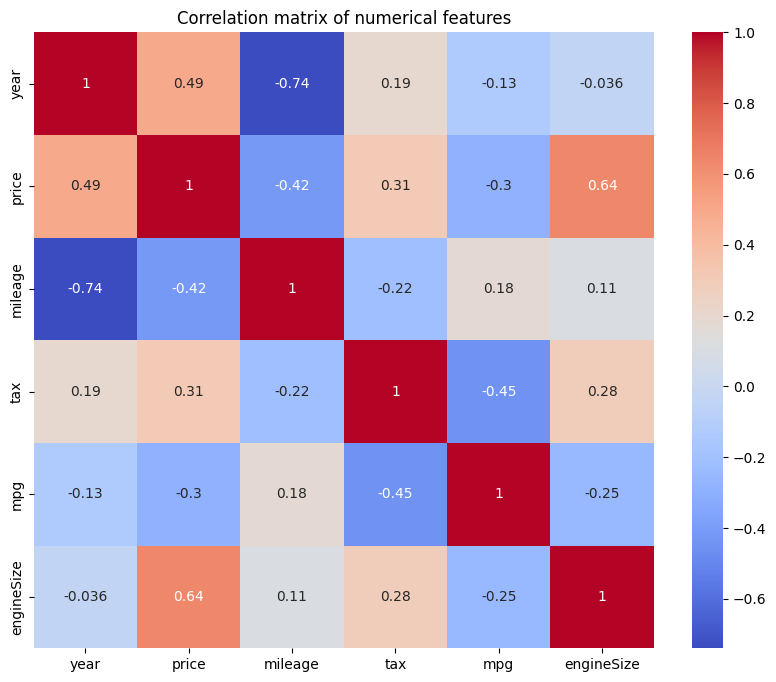

In [71]:
# Correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features')
plt.show()
